In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df= pd.read_csv('train (2).csv')

In [4]:
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [5]:
df.shape

(136429, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [7]:
df.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

<Axes: ylabel='Air temperature [K]'>

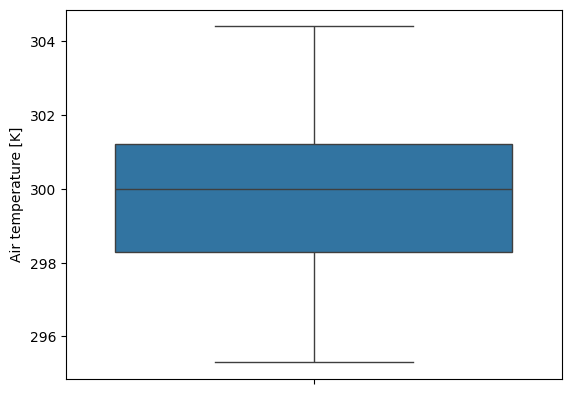

In [8]:
sns.boxplot(df['Air temperature [K]'])

<Axes: ylabel='Process temperature [K]'>

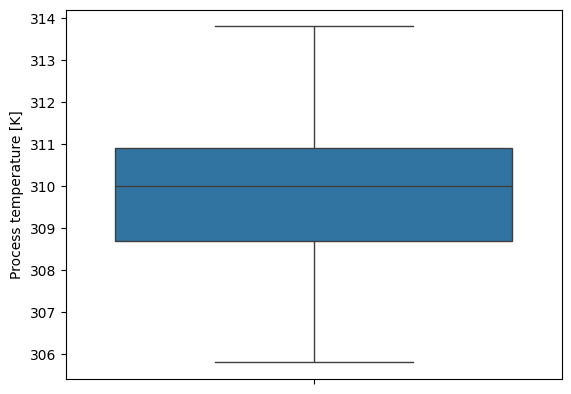

In [9]:
sns.boxplot(df['Process temperature [K]'])

### Check the unique values

In [10]:
df.nunique()

id                         136429
Product ID                   9976
Type                            3
Air temperature [K]            95
Process temperature [K]        81
Rotational speed [rpm]        952
Torque [Nm]                   611
Tool wear [min]               246
Machine failure                 2
TWF                             2
HDF                             2
PWF                             2
OSF                             2
RNF                             2
dtype: int64

### Seperate X and Y

In [11]:
x= df.drop(columns=['id','Product ID','Machine failure'])
y= df[['Machine failure']]

In [12]:
x.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [13]:
y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


In [14]:
y.value_counts()

Machine failure
0                  134281
1                    2148
Name: count, dtype: int64

### Cat Con Seperation

In [15]:
cat1= x.columns[x.dtypes=='object']
con1= x.columns[x.dtypes!='object']

In [16]:
cat1

Index(['Type'], dtype='object')

In [17]:
con1

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF',
       'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

### Create A pipeline for feature selection

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [19]:
num_pipe1= Pipeline(steps=[('Imputer',SimpleImputer(strategy='mean')),
                           ('Scaler',StandardScaler())])

cat_pipe1= Pipeline(steps=[('Imputer',SimpleImputer(strategy='most_frequent')),
                           ('Encoder',OrdinalEncoder())])

pipe1= ColumnTransformer([('num',num_pipe1,con1),
                          ('cat',cat_pipe1,cat1)])

In [20]:
x_pre1= pipe1.fit_transform(x)
x_pre1

array([[ 0.3958803 , -0.24623038,  0.54541592, ..., -0.06303833,
        -0.04756777,  1.        ],
       [ 1.46985559,  1.55860483,  1.72030819, ..., -0.06303833,
        -0.04756777,  2.        ],
       [-0.30220363, -1.04035788,  2.05187289, ..., -0.06303833,
        -0.04756777,  1.        ],
       ...,
       [ 0.34218154,  1.34202461,  0.0264451 , ..., -0.06303833,
        -0.04756777,  1.        ],
       [ 0.98656671,  0.69228393, -0.52856537, ..., -0.06303833,
        -0.04756777,  1.        ],
       [-1.59097397, -1.32913151,  0.26430672, ..., -0.06303833,
        -0.04756777,  1.        ]])

In [21]:
cols1= pipe1.get_feature_names_out()

In [22]:
cols1

array(['num__Air temperature [K]', 'num__Process temperature [K]',
       'num__Rotational speed [rpm]', 'num__Torque [Nm]',
       'num__Tool wear [min]', 'num__TWF', 'num__HDF', 'num__PWF',
       'num__OSF', 'num__RNF', 'cat__Type'], dtype=object)

In [23]:
x_pre1= pd.DataFrame(x_pre1,columns=cols1)
x_pre1

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
...,...,...,...,...,...,...,...,...,...,...,...
136424,0.127386,1.053251,0.069693,-0.335048,1.650769,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
136425,-1.268781,-1.040358,-0.528565,1.029305,-1.601020,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0
136426,0.342182,1.342025,0.026445,-0.217431,1.713303,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
136427,0.986567,0.692284,-0.528565,0.699979,-0.975676,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0


In [24]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(x_pre1,y)
mi


array([0.00515203, 0.00246494, 0.01889517, 0.01958512, 0.00680376,
       0.00812179, 0.02491292, 0.01100982, 0.01965107, 0.00130501,
       0.01118827])

In [25]:
mi =pd.Series(mi)
mi

0     0.005152
1     0.002465
2     0.018895
3     0.019585
4     0.006804
5     0.008122
6     0.024913
7     0.011010
8     0.019651
9     0.001305
10    0.011188
dtype: float64

In [26]:
mi.index= cols1


In [27]:
mi = mi.sort_values(ascending=False)
mi

num__HDF                        0.024913
num__OSF                        0.019651
num__Torque [Nm]                0.019585
num__Rotational speed [rpm]     0.018895
cat__Type                       0.011188
num__PWF                        0.011010
num__TWF                        0.008122
num__Tool wear [min]            0.006804
num__Air temperature [K]        0.005152
num__Process temperature [K]    0.002465
num__RNF                        0.001305
dtype: float64

<Axes: title={'center': 'Mututal information score'}>

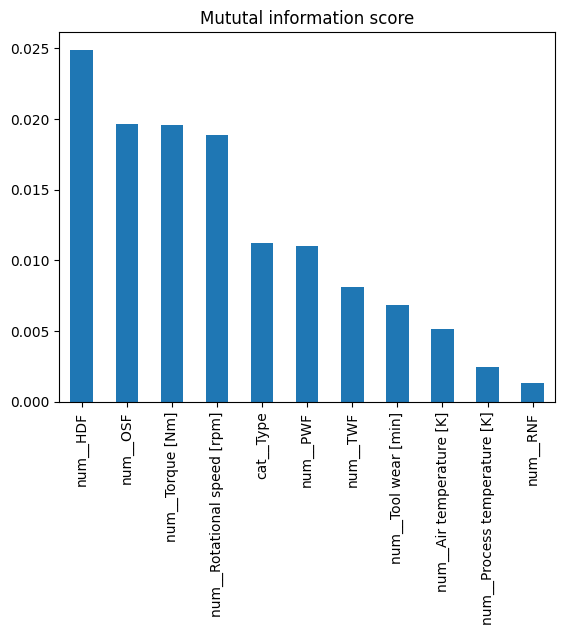

In [28]:
mi.plot(kind='bar',title='Mututal information score')

In [29]:
# Since last two features are not so importat we can drop last 2 feature.

sel_cols= list(mi[0:9].index)
sel_cols

['num__HDF',
 'num__OSF',
 'num__Torque [Nm]',
 'num__Rotational speed [rpm]',
 'cat__Type',
 'num__PWF',
 'num__TWF',
 'num__Tool wear [min]',
 'num__Air temperature [K]']

In [30]:
sel_cols[1].split('__')[1]

'OSF'

In [31]:
imp_cols= []
for i in sel_cols:
    s=i.split('__')[1]
    imp_cols.append(s)

In [32]:
imp_cols

['HDF',
 'OSF',
 'Torque [Nm]',
 'Rotational speed [rpm]',
 'Type',
 'PWF',
 'TWF',
 'Tool wear [min]',
 'Air temperature [K]']

In [33]:
x_sel= x[imp_cols]
x_sel

,HDF,OSF,Torque [Nm],Rotational speed [rpm],Type,PWF,TWF,Tool wear [min],Air temperature [K]
0,0,0,36.1,1596,L,0,0,140,300.6
1,0,0,29.1,1759,M,0,0,200,302.6
2,0,0,26.5,1805,L,0,0,25,299.3
3,0,0,44.3,1524,L,0,0,197,301.0
4,0,0,35.4,1641,M,0,0,34,298.0
...,...,...,...,...,...,...,...,...,...
136424,0,0,37.5,1530,M,0,0,210,300.1
136425,0,0,49.1,1447,H,0,0,2,297.5
136426,0,0,38.5,1524,L,0,0,214,300.5
136427,0,0,46.3,1447,L,0,0,42,301.7


### create a categorical and contineous features for selected features

In [34]:
cat= x_sel.columns[x_sel.dtypes=='object']
con= x_sel.columns[x_sel.dtypes!='object']

In [35]:
cat

Index(['Type'], dtype='object')

In [36]:
con

Index(['HDF', 'OSF', 'Torque [Nm]', 'Rotational speed [rpm]', 'PWF', 'TWF',
       'Tool wear [min]', 'Air temperature [K]'],
      dtype='object')

### Create a Pipeline for Preprocessing

In [37]:
from sklearn.preprocessing import OneHotEncoder

In [38]:
num_pipe= Pipeline(steps=[('Imputer',SimpleImputer(strategy='mean')),
                           ('Scaler',StandardScaler())])

cat_pipe= Pipeline(steps=[('Imputer',SimpleImputer(strategy='most_frequent')),
                           ('Ohe',OneHotEncoder())])

pipe= ColumnTransformer([('num',num_pipe,con),
                          ('cat',cat_pipe,cat)])

In [39]:
x_pre= pipe.fit_transform(x_sel)
x_pre

array([[-0.07202055, -0.06303833, -0.49971115, ...,  0.        ,
         1.        ,  0.        ],
       [-0.07202055, -0.06303833, -1.32302768, ...,  0.        ,
         0.        ,  1.        ],
       [-0.07202055, -0.06303833, -1.62883096, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.07202055, -0.06303833, -0.2174312 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.07202055, -0.06303833,  0.69997864, ...,  0.        ,
         1.        ,  0.        ],
       [-0.07202055, -0.06303833, -0.12333789, ...,  0.        ,
         1.        ,  0.        ]])

In [40]:
cols= pipe.get_feature_names_out()

In [41]:
cols

array(['num__HDF', 'num__OSF', 'num__Torque [Nm]',
       'num__Rotational speed [rpm]', 'num__PWF', 'num__TWF',
       'num__Tool wear [min]', 'num__Air temperature [K]', 'cat__Type_H',
       'cat__Type_L', 'cat__Type_M'], dtype=object)

In [42]:
xpre= pd.DataFrame(x_pre, columns=cols)

In [43]:
xpre.head()

,num__HDF,num__OSF,num__Torque [Nm],num__Rotational speed [rpm],num__PWF,num__TWF,num__Tool wear [min],num__Air temperature [K],cat__Type_H,cat__Type_L,cat__Type_M
0,-0.072021,-0.063038,-0.499711,0.545416,-0.049016,-0.03945,0.556417,0.395880,0.0,1.0,0.0
1,-0.072021,-0.063038,-1.323028,1.720308,-0.049016,-0.03945,1.494433,1.469856,0.0,0.0,1.0
2,-0.072021,-0.063038,-1.628831,2.051873,-0.049016,-0.03945,-1.241447,-0.302204,0.0,1.0,0.0
3,-0.072021,-0.063038,0.464745,0.026445,-0.049016,-0.03945,1.447532,0.610675,0.0,1.0,0.0
4,-0.072021,-0.063038,-0.582043,0.869773,-0.049016,-0.03945,-1.100744,-1.000288,0.0,0.0,1.0


### Train Test Splt


In [44]:
from sklearn.model_selection import train_test_split
xtrain,xtest, ytrain, ytest = train_test_split(xpre,y,train_size= 0.86, random_state= 55 )

In [45]:
xtrain.shape

(117328, 11)

In [46]:
xtest.shape

(19101, 11)

### Evaluate Algorithms

#### Here dataset size is bigger so we can ignore SVM and KNN (These algorithms are slow and less effective on larger datasets)


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


#### Create Dictionary for all libraries


In [48]:
dict= {'LogisticRegression':LogisticRegression(),
       'DecisionTree':DecisionTreeClassifier(),
       'RandomForest': RandomForestClassifier(),
       'GradientBoosting': GradientBoostingClassifier()}

In [49]:
dict.items()

dict_items([('LogisticRegression', LogisticRegression()), ('DecisionTree', DecisionTreeClassifier()), ('RandomForest', RandomForestClassifier()), ('GradientBoosting', GradientBoostingClassifier())])

### Create a 'For loop' to evluate algorithms

In [50]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [51]:
tr= [] #  To store training score (f1 score)
tr_cv= []  # To store cross validation score of training data
ts= [] # To store testing score (f1 score)
for name, model in dict.items():
    # Fit data
    model.fit(xtrain,ytrain)

    # predict
    y_tr_pred= model.predict(xtrain)
    y_ts_pred= model.predict(xtest)

    ## f1_score Training results:
    
    f1_tr= f1_score(ytrain,y_tr_pred)

     # cross_validation score:
    scores= cross_val_score(model,xtrain,ytrain,cv= 5, scoring='f1')
    f1_tr_cv= scores.mean()

    ## Testing results:
     #f1_score
    f1_ts= f1_score(ytest,y_ts_pred)

    # Append all the scores in list
    tr.append(f1_tr)
    tr_cv.append(f1_tr_cv)
    ts.append(f1_ts)

    # print all the results
    print(f'Model name : {name}')
    print(f'Trainig_f1 : {f1_tr}')
    print(f'Training_CV : {f1_tr_cv}')
    print(f'Testing_f1 :{f1_ts}')
    print('=====================================')


Model name : LogisticRegression
Trainig_f1 : 0.8627087198515769
Training_CV : 0.8616965685802558
Testing_f1 :0.8661971830985915
Model name : DecisionTree
Trainig_f1 : 0.9928492849284928
Training_CV : 0.7513322080137289
Testing_f1 :0.7560975609756098
Model name : RandomForest
Trainig_f1 : 0.9923161361141603
Training_CV : 0.8561143554521141
Testing_f1 :0.8601036269430052
Model name : GradientBoosting
Trainig_f1 : 0.8720466400736423
Training_CV : 0.8590169474658979
Testing_f1 :0.8636363636363636


### Display all the model scores in Dataframe

In [52]:
dict.keys()

dict_keys(['LogisticRegression', 'DecisionTree', 'RandomForest', 'GradientBoosting'])

In [53]:
dict.values()

dict_values([LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier()])

In [54]:
eval_dict= {'ModelName' : dict.keys(),
            'TrainingF1': tr,
            'TestingF1' :ts,
            'TrainCV' : tr_cv}

In [55]:
eval_dict

{'ModelName': dict_keys(['LogisticRegression', 'DecisionTree', 'RandomForest', 'GradientBoosting']),
 'TrainingF1': [0.8627087198515769,
  0.9928492849284928,
  0.9923161361141603,
  0.8720466400736423],
 'TestingF1': [0.8661971830985915,
  0.7560975609756098,
  0.8601036269430052,
  0.8636363636363636],
 'TrainCV': [0.8616965685802558,
  0.7513322080137289,
  0.8561143554521141,
  0.8590169474658979]}

In [56]:
eval_df= pd.DataFrame(eval_dict)
eval_df

,ModelName,TrainingF1,TestingF1,TrainCV
0,LogisticRegression,0.862709,0.866197,0.861697
1,DecisionTree,0.992849,0.756098,0.751332
2,RandomForest,0.992316,0.860104,0.856114
3,GradientBoosting,0.872047,0.863636,0.859017


In [57]:
eval_df.sort_values(by='TrainCV',ascending=False)

,ModelName,TrainingF1,TestingF1,TrainCV
0,LogisticRegression,0.862709,0.866197,0.861697
3,GradientBoosting,0.872047,0.863636,0.859017
2,RandomForest,0.992316,0.860104,0.856114
1,DecisionTree,0.992849,0.756098,0.751332


#### Here Best model is Logistic Regression 

### Tune the best model with Randomized Search CV

In [58]:
params= {'C': [0.01,0.1,1,10,50,100,500,1000]}

In [59]:
from sklearn.model_selection import RandomizedSearchCV
lr= LogisticRegression()
rscv= RandomizedSearchCV(lr,param_distributions=params, cv=5, scoring='f1')
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.01, 0.1, 1, 10, 50, 100, 500,
                                              1000]},
                   scoring='f1')

In [60]:
rscv.best_params_

{'C': 0.01}

In [61]:
rscv.best_score_

0.8623119620287323

In [62]:
best_lr = rscv.best_estimator_
best_lr

LogisticRegression(C=0.01)

In [63]:
best_lr.score(xtrain,ytrain)

0.9962072139642711

In [64]:
best_lr.score(xtest,ytest)

0.9960211507250929

### Prediction for testing and training

In [65]:
ypred_tr= best_lr.predict(xtrain)
ypred_ts= best_lr.predict(xtest)

In [66]:
ypred_tr[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [67]:
ypred_ts[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

### Confusion matrix

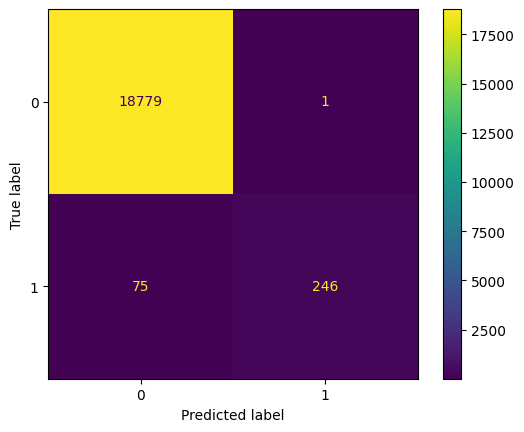

In [70]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf= confusion_matrix(ytest,ypred_ts)
cfd= ConfusionMatrixDisplay(cf, display_labels= best_lr.classes_)
cfd.plot()

### Classification report

In [71]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18780
           1       1.00      0.77      0.87       321

    accuracy                           1.00     19101
   macro avg       1.00      0.88      0.93     19101
weighted avg       1.00      1.00      1.00     19101



### Plotting ROC- AUC Curve

In [73]:
yprob_ts= best_lr.predict_proba(xtest)[:,1]
yprob_ts

array([1.75219429e-03, 1.02313710e-02, 7.06604067e-04, ...,
       1.01847382e-02, 1.34506722e-03, 9.78379594e-01])

In [75]:
# To check ROC-AUC curve in testing
from sklearn.metrics import roc_auc_score
roc_auc_score(ytest,yprob_ts)

0.931203905526858

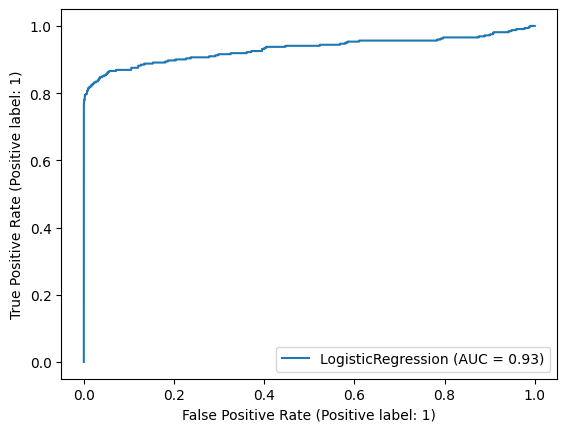

In [76]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_lr,xtest,ytest)

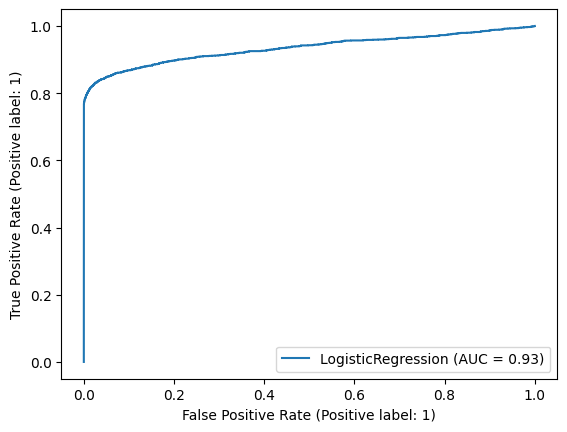

In [77]:
RocCurveDisplay.from_estimator(best_lr,xtrain,ytrain)

### Prediction on new data

In [79]:
xnew= pd.read_csv("test (2).csv")
xnew

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90949,227378,L51130,L,302.3,311.4,1484,40.4,15,0,0,0,0,0
90950,227379,L47783,L,297.9,309.8,1542,33.8,31,0,0,0,0,0
90951,227380,L48097,L,295.6,306.2,1501,41.4,187,0,0,0,0,0
90952,227381,L48969,L,298.1,307.8,1534,40.3,69,0,0,0,0,0


In [80]:
xpre.shape

(136429, 11)

In [81]:
xpre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   num__HDF                     136429 non-null  float64
 1   num__OSF                     136429 non-null  float64
 2   num__Torque [Nm]             136429 non-null  float64
 3   num__Rotational speed [rpm]  136429 non-null  float64
 4   num__PWF                     136429 non-null  float64
 5   num__TWF                     136429 non-null  float64
 6   num__Tool wear [min]         136429 non-null  float64
 7   num__Air temperature [K]     136429 non-null  float64
 8   cat__Type_H                  136429 non-null  float64
 9   cat__Type_L                  136429 non-null  float64
 10  cat__Type_M                  136429 non-null  float64
dtypes: float64(11)
memory usage: 11.4 MB


In [82]:
xnew_pre= pipe.transform(xnew)
xnew_pre

array([[-0.07202055, -0.06303833, -0.27623953, ...,  0.        ,
         1.        ,  0.        ],
       [-0.07202055, -0.06303833, -1.35831267, ...,  0.        ,
         1.        ,  0.        ],
       [-0.07202055, -0.06303833, -0.31152452, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.07202055, -0.06303833,  0.12365707, ...,  0.        ,
         1.        ,  0.        ],
       [-0.07202055, -0.06303833, -0.00572124, ...,  0.        ,
         1.        ,  0.        ],
       [-0.07202055, -0.06303833, -0.49971115, ...,  0.        ,
         1.        ,  0.        ]])

In [83]:
cols

array(['num__HDF', 'num__OSF', 'num__Torque [Nm]',
       'num__Rotational speed [rpm]', 'num__PWF', 'num__TWF',
       'num__Tool wear [min]', 'num__Air temperature [K]', 'cat__Type_H',
       'cat__Type_L', 'cat__Type_M'], dtype=object)

In [84]:
xnew_pre= pd.DataFrame(xnew_pre,columns=cols)
xnew_pre

,num__HDF,num__OSF,num__Torque [Nm],num__Rotational speed [rpm],num__PWF,num__TWF,num__Tool wear [min],num__Air temperature [K],cat__Type_H,cat__Type_L,cat__Type_M
0,-0.072021,-0.063038,-0.276240,-0.153753,-0.049016,-0.03945,-0.694271,1.308759,0.0,1.0,0.0
1,-0.072021,-0.063038,-1.358313,1.388744,-0.049016,-0.03945,-1.366516,0.986567,0.0,1.0,0.0
2,-0.072021,-0.063038,-0.311525,0.033653,-0.049016,-0.03945,-0.131461,0.771772,0.0,1.0,0.0
3,-0.072021,-0.063038,0.852880,-0.297912,-0.049016,-0.03945,-1.554119,0.127386,0.0,0.0,1.0
4,-0.072021,-0.063038,0.111895,-0.038426,-0.049016,-0.03945,0.149943,1.899446,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
90949,-0.072021,-0.063038,0.006040,-0.261872,-0.049016,-0.03945,-1.397783,1.308759,0.0,1.0,0.0
90950,-0.072021,-0.063038,-0.770229,0.156188,-0.049016,-0.03945,-1.147645,-1.053986,0.0,1.0,0.0
90951,-0.072021,-0.063038,0.123657,-0.139337,-0.049016,-0.03945,1.291196,-2.289058,0.0,1.0,0.0
90952,-0.072021,-0.063038,-0.005721,0.098524,-0.049016,-0.03945,-0.553568,-0.946589,0.0,1.0,0.0


In [86]:
preds= best_lr.predict(xnew_pre)
preds[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [89]:
prob= best_lr.predict_proba(xnew_pre)[:,1]
prob[0:10]

array([0.00279865, 0.00133735, 0.00287329, 0.00354093, 0.00456062,
       0.00257766, 0.00380445, 0.00564482, 0.00184564, 0.0018207 ])

In [91]:
# To save results in Dataframe

df_pred= xnew[['id']]
df_pred

,id
0,136429
1,136430
2,136431
3,136432
4,136433
...,...
90949,227378
90950,227379
90951,227380
90952,227381


In [93]:
df_pred['Machine_Failure_preds']= preds

In [94]:
df_pred

,id,Machine_Failure_preds
0,136429,0
1,136430,0
2,136431,0
3,136432,0
4,136433,0
...,...,...
90949,227378,0
90950,227379,0
90951,227380,0
90952,227381,0


In [95]:
df_pred['Probability']= prob
df_pred

,id,Machine_Failure_preds,Probability
0,136429,0,0.002799
1,136430,0,0.001337
2,136431,0,0.002873
3,136432,0,0.003541
4,136433,0,0.004561
...,...,...,...
90949,227378,0,0.002896
90950,227379,0,0.001103
90951,227380,0,0.002789
90952,227381,0,0.002315


In [98]:
v_count= df_pred['Machine_Failure_preds'].value_counts()
v_count

Machine_Failure_preds
0    89851
1     1103
Name: count, dtype: int64

<Axes: xlabel='Machine_Failure_preds'>

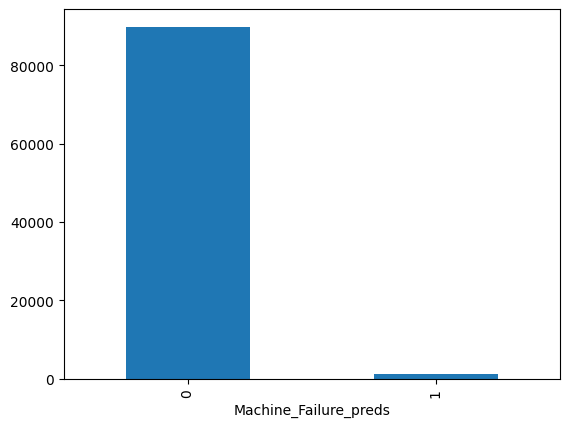

In [99]:
v_count.plot(kind='bar')

In [101]:
df_pred[df_pred['Machine_Failure_preds']==1]

,id,Machine_Failure_preds,Probability
17,136446,1,0.987003
209,136638,1,0.989760
223,136652,1,0.977440
397,136826,1,0.989913
405,136834,1,0.956032
...,...,...,...
90340,226769,1,0.977441
90503,226932,1,0.976256
90665,227094,1,0.996562
90784,227213,1,0.976786


In [102]:
df_pred.to_csv('Test_Predictions.csv',index=False)